In [3]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [22]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data package

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
# Import libraries
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# Load the dataset
comments = pd.read_csv('/content/comments.csv')

In [26]:
# Inspect the data
print(comments.head())


   id                 comment  User  id  Photo id created Timestamp  \
0   1         unde at dolorem         2         1  13-04-2023 08:04   
1   2         quae ea ducimus         3         1  13-04-2023 08:04   
2   3      alias a voluptatum         5         1  13-04-2023 08:04   
3   4    facere suscipit sunt        14         1  13-04-2023 08:04   
4   5  totam eligendi quaerat        17         1  13-04-2023 08:04   

  posted date emoji used  Hashtags used count  
0    April 14        yes                    1  
1    April 14         no                    2  
2    April 14         no                    4  
3    April 14        yes                    2  
4    April 14        yes                    1  


In [27]:
print(comments.columns)


Index(['id', 'comment', 'User  id', 'Photo id', 'created Timestamp',
       'posted date', 'emoji used', 'Hashtags used count'],
      dtype='object')


In [28]:
# Check if the 'comment' column exists
if 'comment' not in comments.columns:
    raise ValueError("Column 'comment' not found in the dataset. Available columns are: " + ", ".join(comments.columns))


In [29]:
# Clean the text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text


In [30]:
# Apply cleaning
comments['cleaned_text'] = comments['comment'].apply(clean_text)

In [31]:
# Tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

comments['processed_text'] = comments['cleaned_text'].apply(tokenize_and_remove_stopwords)


In [41]:
# Apply tokenization and remove stopwords
comments['processed_text'] = comments['cleaned_text'].apply(tokenize_and_remove_stopwords)


In [42]:
# Display a sample of processed text
print("Sample of processed text (after tokenization and stopword removal):")
print(comments[['cleaned_text', 'processed_text']].head())

Sample of processed text (after tokenization and stopword removal):
             cleaned_text          processed_text
0         unde at dolorem            unde dolorem
1         quae ea ducimus         quae ea ducimus
2      alias a voluptatum        alias voluptatum
3    facere suscipit sunt    facere suscipit sunt
4  totam eligendi quaerat  totam eligendi quaerat


In [32]:
# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

comments['sentiment'] = comments['processed_text'].apply(analyze_sentiment)


In [33]:
# Analyze the results
sentiment_counts = comments['sentiment'].value_counts()

<ipython-input-34-8ece6a2ec5c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


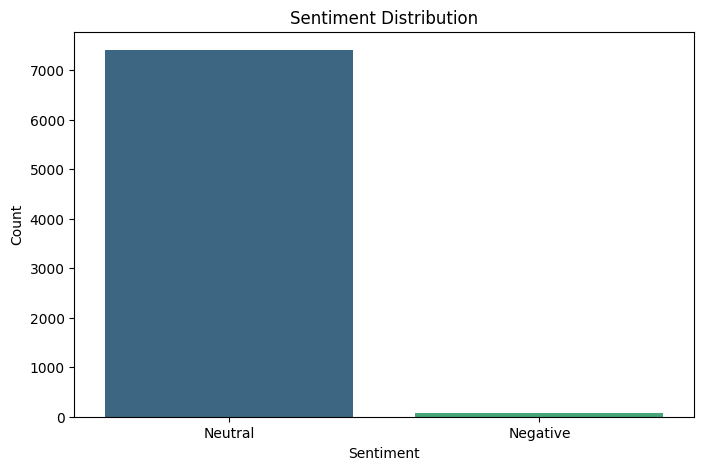

In [34]:
# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [35]:
# Save the processed data
output_file = '/content/comments.csv'
comments.to_csv(output_file, index=False)
print(f"Processed data saved to {output_file}")


Processed data saved to /content/comments.csv
